In [206]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [207]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
feature_names = load_headers(DATA_TRAIN_PATH)

# convert y from -1/1 to 0,1
y = (y+1)/2

In [208]:
# signals and backgrounds
sig = np.where(y==1)[0]
back = np.where(y==0)[0]
tX_sig = tX[sig,:]
tX_back = tX[back,:]

## Visualization original data

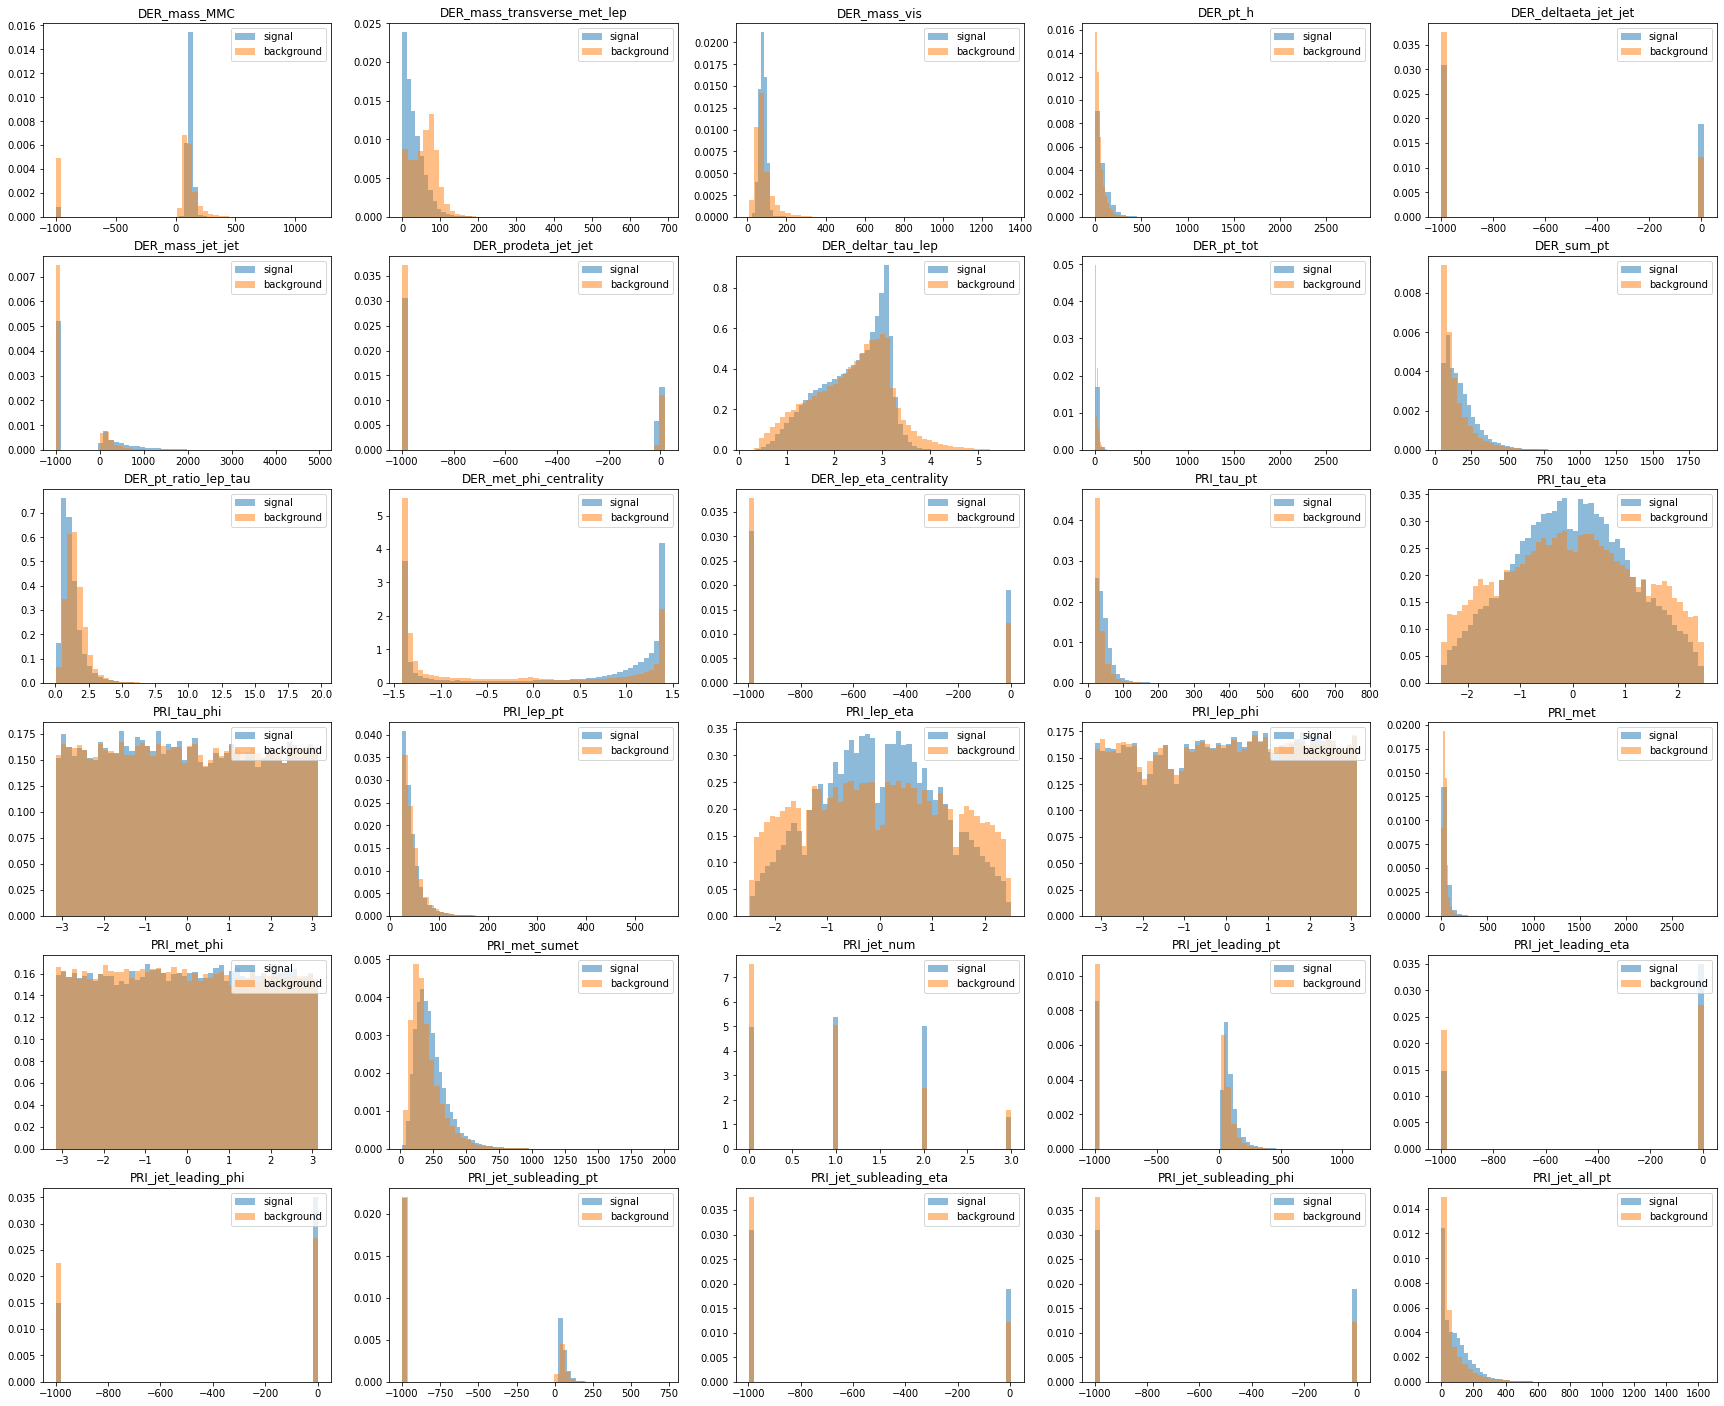

In [54]:
num_row = 6
num_col = 5
jet_nums_ = [0,1,2,3]
f, axs = plt.subplots(num_row, num_col,figsize=(30,25))
axs = axs.ravel()
for idx,ax in enumerate(axs):
    ax.hist(tX_sig[:,idx],density=True, bins=50,alpha=0.5,label = 'signal')
    ax.hist(tX_back[:,idx],density=True, bins=50,alpha=0.5,label = 'background')
    ax.legend(loc='upper right')
    ax.set_title(feature_names[idx])

## Delete non-groupable undefined data

In [209]:
tX.shape

(250000, 30)

In [210]:
idx_null_mass = np.where(tX[:,1]==0)[0]
tX = np.delete(tX,idx_null_mass,0)
y = np.delete(y,idx_null_mass,0)

## Regrouping data

In [211]:
# Regouping data
## Find the index of each group based on PRI_jet_num
idx0 = np.where(tX[:,22]==0)[0]
idx1 = np.where(tX[:,22]==1)[0]
idx23 = np.where(tX[:,22]>1)[0]

## Regroup
y0 = y[idx0]
tX0 = tX[idx0,:]

y1 = y[idx1]
tX1 = tX[idx1,:]

y23 = y[idx23]
tX23 = tX[idx23,:]

## Clean undefined features of each group (still keep null in DER_mass_MMC)
null_idx_0 = [ 4,  5,  6, 12, 22, 23, 24, 25, 26, 27, 28,29]
null_idx_1 = [ 4,  5,  6, 12, 22, 26, 27, 28]
null_idx_23 = [22]

tX0 = np.delete(tX0,null_idx_0,1)
tX1 = np.delete(tX1,null_idx_1,1)
tX23 = np.delete(tX23,null_idx_23,1)

## Recount the number of feature of each group
n_feature_0, n_feature_1, n_feature_23 = (tX0.shape[1], tX1.shape[1], tX23.shape[1])

## feature names
feature_names_0 = np.delete(feature_names,null_idx_0,0)
feature_names_1 = np.delete(feature_names,null_idx_1,0)
feature_names_23 = np.delete(feature_names,null_idx_23,0)
## data_size of each group
n_0 , n_1, n_23 = (len(y0), len(y1), len(y23))

## Clear outliers and rescale data

In [212]:
def outlier_cleaning(tx,method=''):
    row,col = tx.shape
    
    for i in range(col):
        #calculate Interquartile Range 
        q1_tx = np.percentile(tx[:,i], 0.25,axis=0)
        q3_tx = np.quantile(tx[:,i], 0.75,axis=0)
        iqr_tx = q3_tx - q1_tx
        upper = q1_tx - 1.5 * iqr_tx
        lower = q1_tx + 1.5 * iqr_tx
        
        #calculate mean value for each feature
        mean = np.mean(tx[:,i])
        median = np.median(tx[:,i])
        
        
        #outlier check: for each featute(column),drop/replace the value not in the range 
        #of [q1_x-1.5iqr_x, q3_x+1.5iqr_x] with the mean/median value of the featute
        if method == 'mean':
            for j in range(col):
                if tx[j,i] < lower:
                    tx[j,i]= mean
                elif tx[j,i] >upper:
                    tx[j,i]= mean
                    
        elif method == 'median':
            for j in range(col):
                if tx[j,i] < lower:
                    tx[j,i]= median
                elif tx[j,i] >upper:
                    tx[j,i]= median
                    
        elif method == 'drop':
            for j in range(col):
                if tx[j,i] < lower:
                    np.delete(tx, j, axis=0)
                elif tx[j,i] >upper:
                    np.delete(tx, j, axis=0)

    return tx

In [213]:
# process outliers
tX0 = outlier_cleaning(tX0,method='mean')
tX1 = outlier_cleaning(tX1,method='mean')
tX23 = outlier_cleaning(tX23,method='mean')

### Rescale data

In [214]:
def feature_normalize(tx):
    mu = np.mean(tx,axis=0)
    sigma = np.std(tx,axis=0)
    return (tx-mu)/sigma

In [215]:
tX0 = feature_normalize(tX0)
tX1 = feature_normalize(tX1)
tX23 = feature_normalize(tX23)

## Feature visualization¶

### Visualize tX0

In [175]:
n_feature_0

18

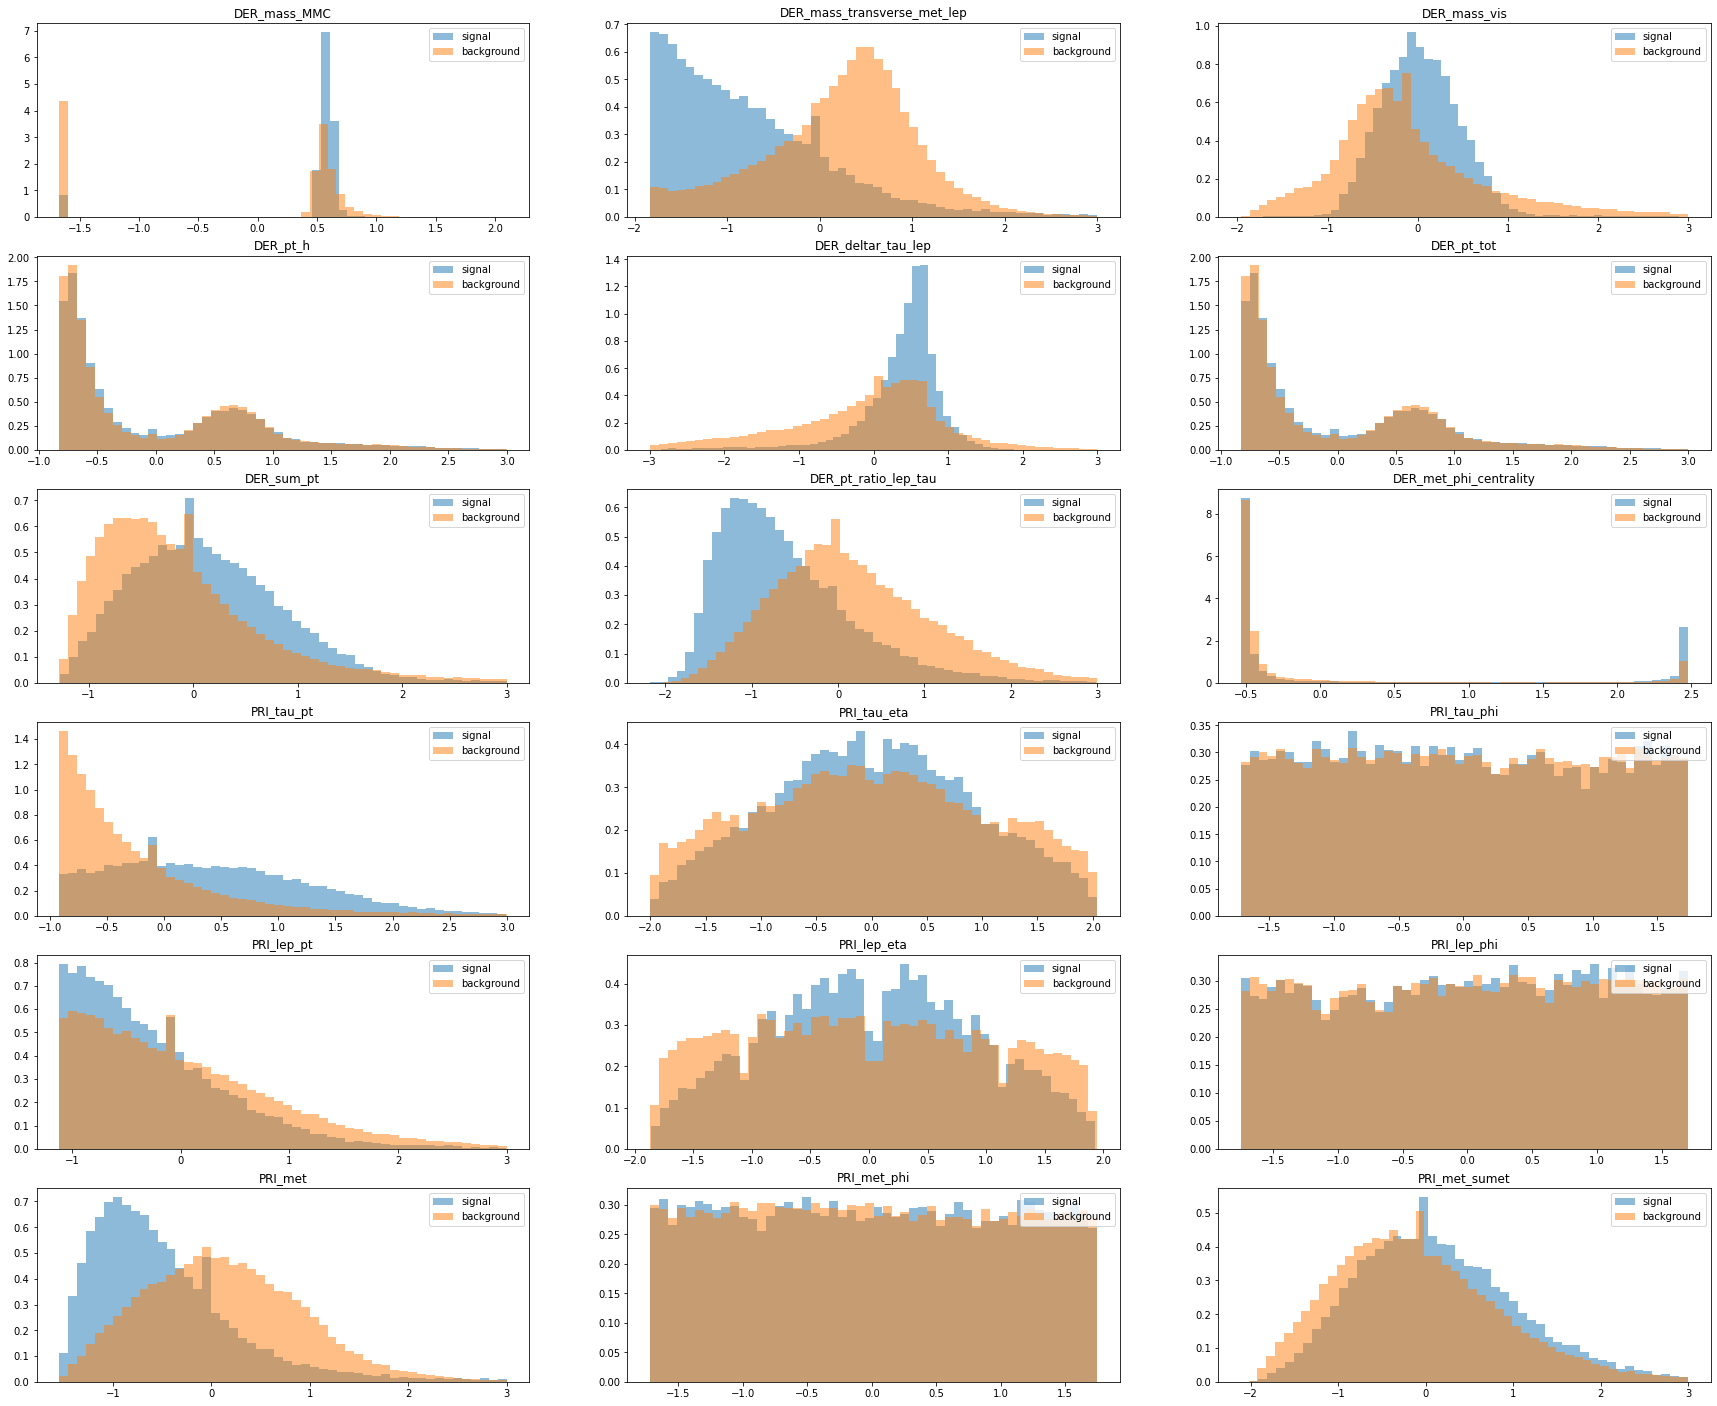

In [171]:
num_row = 6
num_col = 3
f, axs = plt.subplots(num_row, num_col,figsize=(30,25))
axs = axs.ravel()
#for feature in tX.T:
    #axs.hist(feature, density=True, bins=100);
for idx,ax in enumerate(axs):
    ax.hist(tX0[np.where(y0==1)[0],idx],density=True, bins=50,alpha=0.5,label = 'signal')
    ax.hist(tX0[np.where(y0==0)[0],idx],density=True, bins=50,alpha=0.5,label = 'background')
    ax.legend(loc='upper right')
    ax.set_title(feature_names_0[idx])

### Visualize tX1

In [173]:
n_feature_1

22

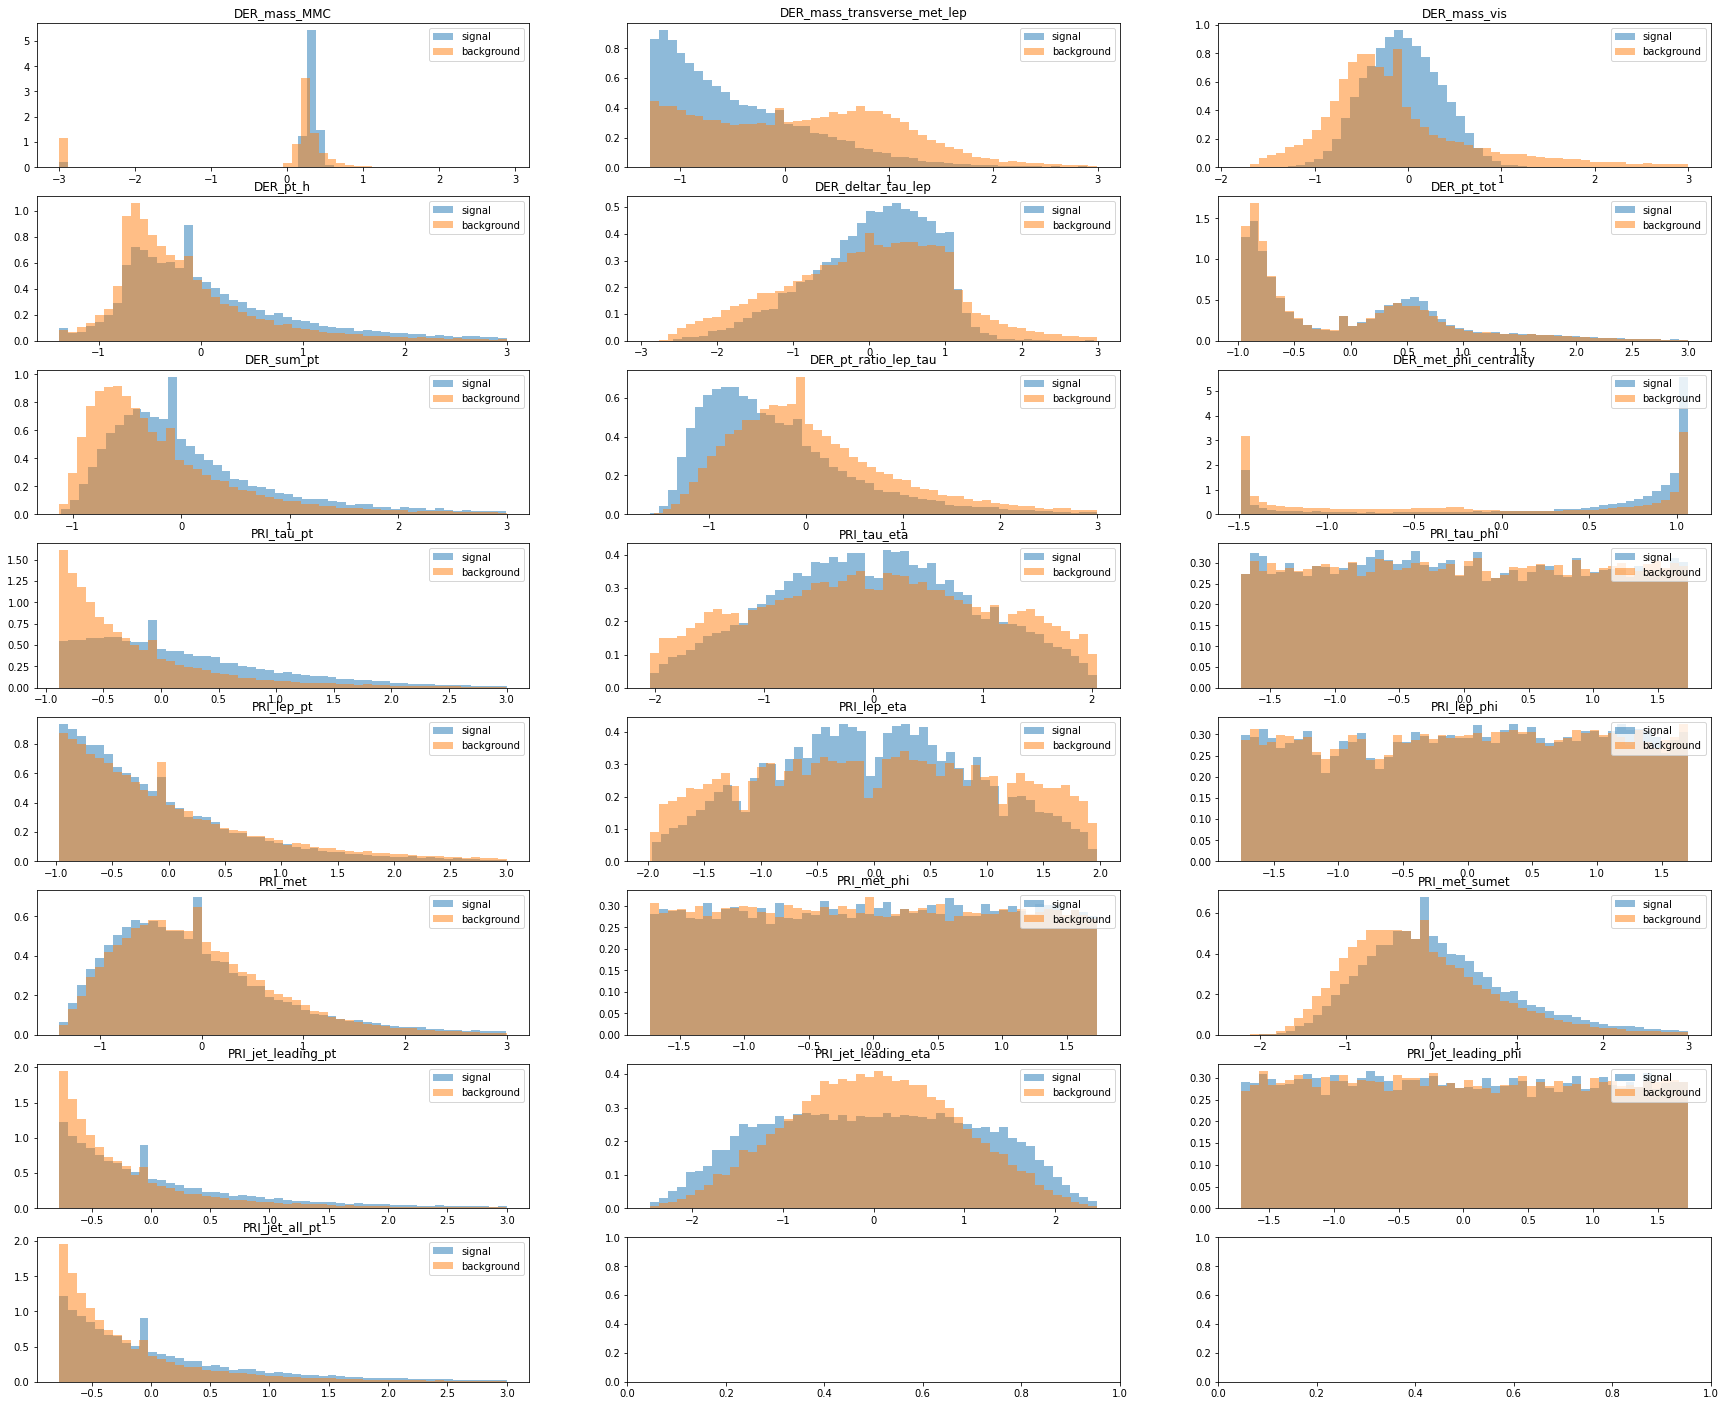

In [176]:
num_row = 8
num_col = 3
f, axs = plt.subplots(num_row, num_col,figsize=(30,25))
axs = axs.ravel()
#for feature in tX.T:
    #axs.hist(feature, density=True, bins=100);
for idx,ax in enumerate(axs):
    if idx < 22:
        ax.hist(tX1[np.where(y1==1)[0],idx],density=True, bins=50,alpha=0.5,label = 'signal')
        ax.hist(tX1[np.where(y1==0)[0],idx],density=True, bins=50,alpha=0.5,label = 'background')
        ax.legend(loc='upper right')
        ax.set_title(feature_names_1[idx])

### Visualize tX23

In [177]:
n_feature_23

29

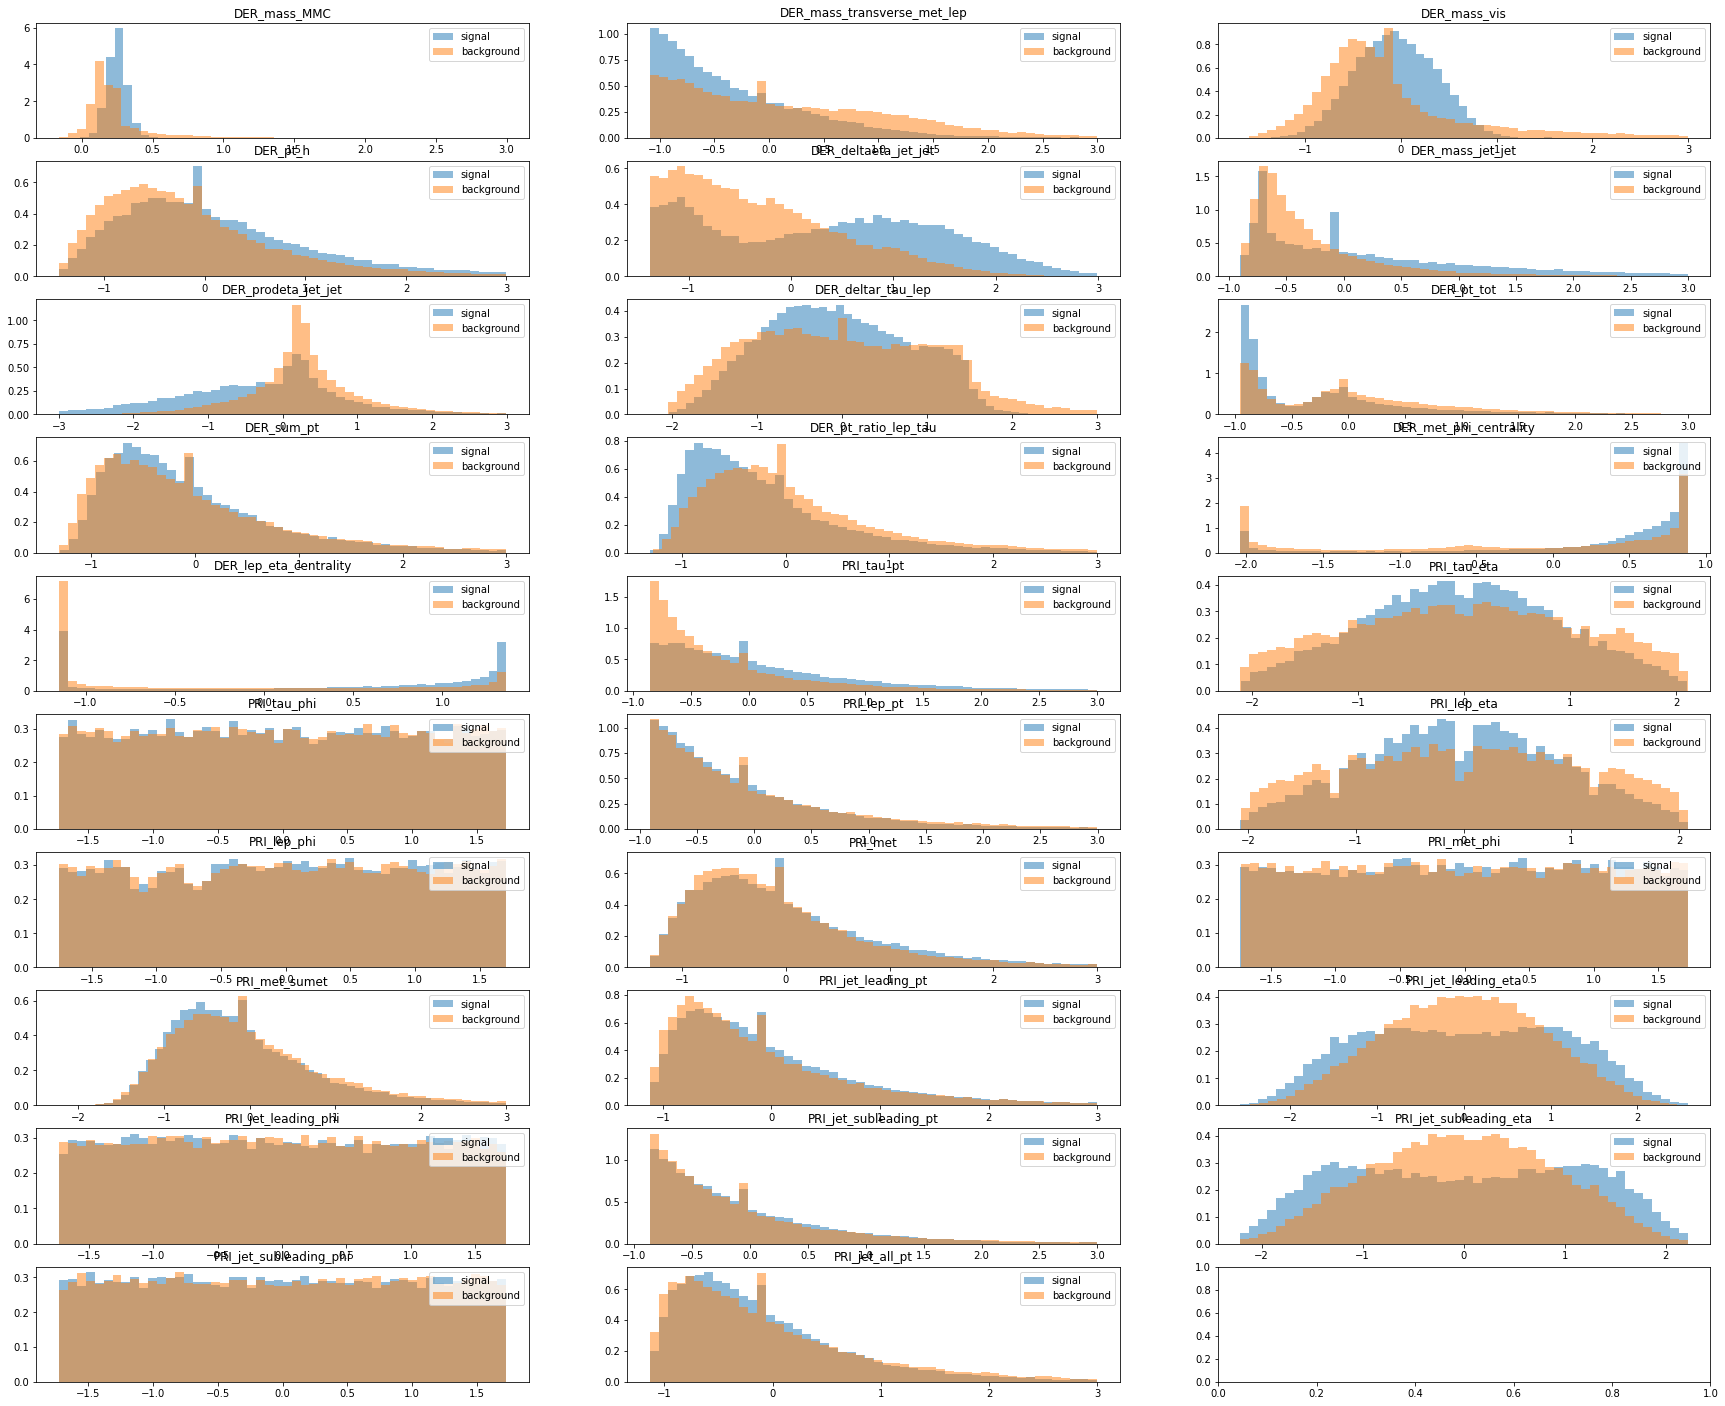

In [178]:
num_row = 10
num_col = 3
f, axs = plt.subplots(num_row, num_col,figsize=(30,25))
axs = axs.ravel()
#for feature in tX.T:
    #axs.hist(feature, density=True, bins=100);
for idx,ax in enumerate(axs):
    if idx < 29:
        ax.hist(tX23[np.where(y23==1)[0],idx],density=True, bins=50,alpha=0.5,label = 'signal')
        ax.hist(tX23[np.where(y23==0)[0],idx],density=True, bins=50,alpha=0.5,label = 'background')
        ax.legend(loc='upper right')
        ax.set_title(feature_names_23[idx])

### Others

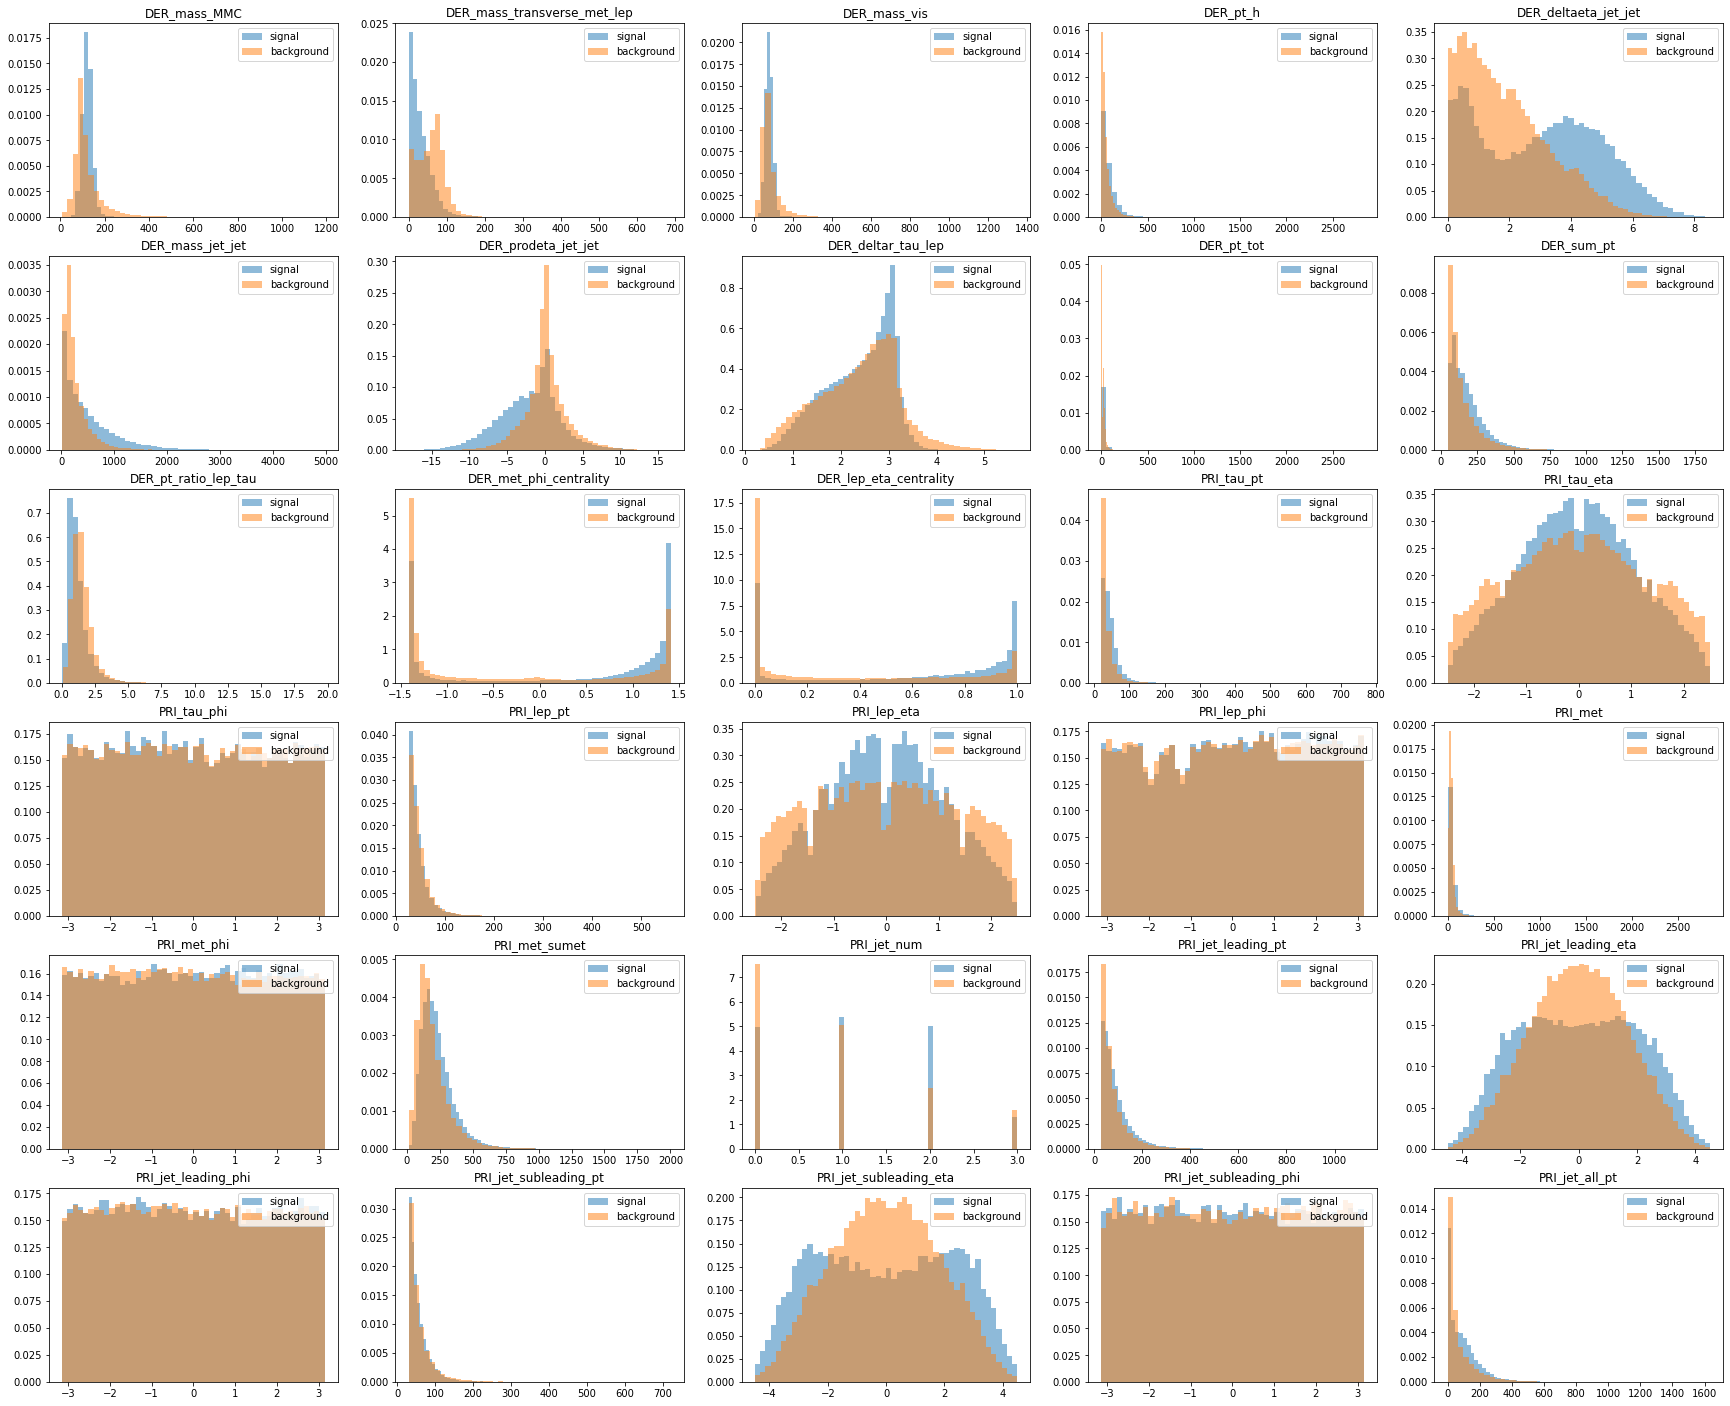

In [179]:
num_row = 6
num_col = 5
f, axs = plt.subplots(num_row, num_col,figsize=(30,25))
axs = axs.ravel()
#for feature in tX.T:
    #axs.hist(feature, density=True, bins=100);
for idx,ax in enumerate(axs):
    good_sig = np.where(tX_sig[:,idx]>-999)[0]
    ax.hist(tX_sig[good_sig,idx],density=True, bins=50,alpha=0.5,label = 'signal')
    good_back = np.where(tX_back[:,idx]>-999)[0]
    ax.hist(tX_back[good_back,idx],density=True, bins=50,alpha=0.5,label = 'background')
    ax.legend(loc='upper right')
    ax.set_title(feature_names[idx])

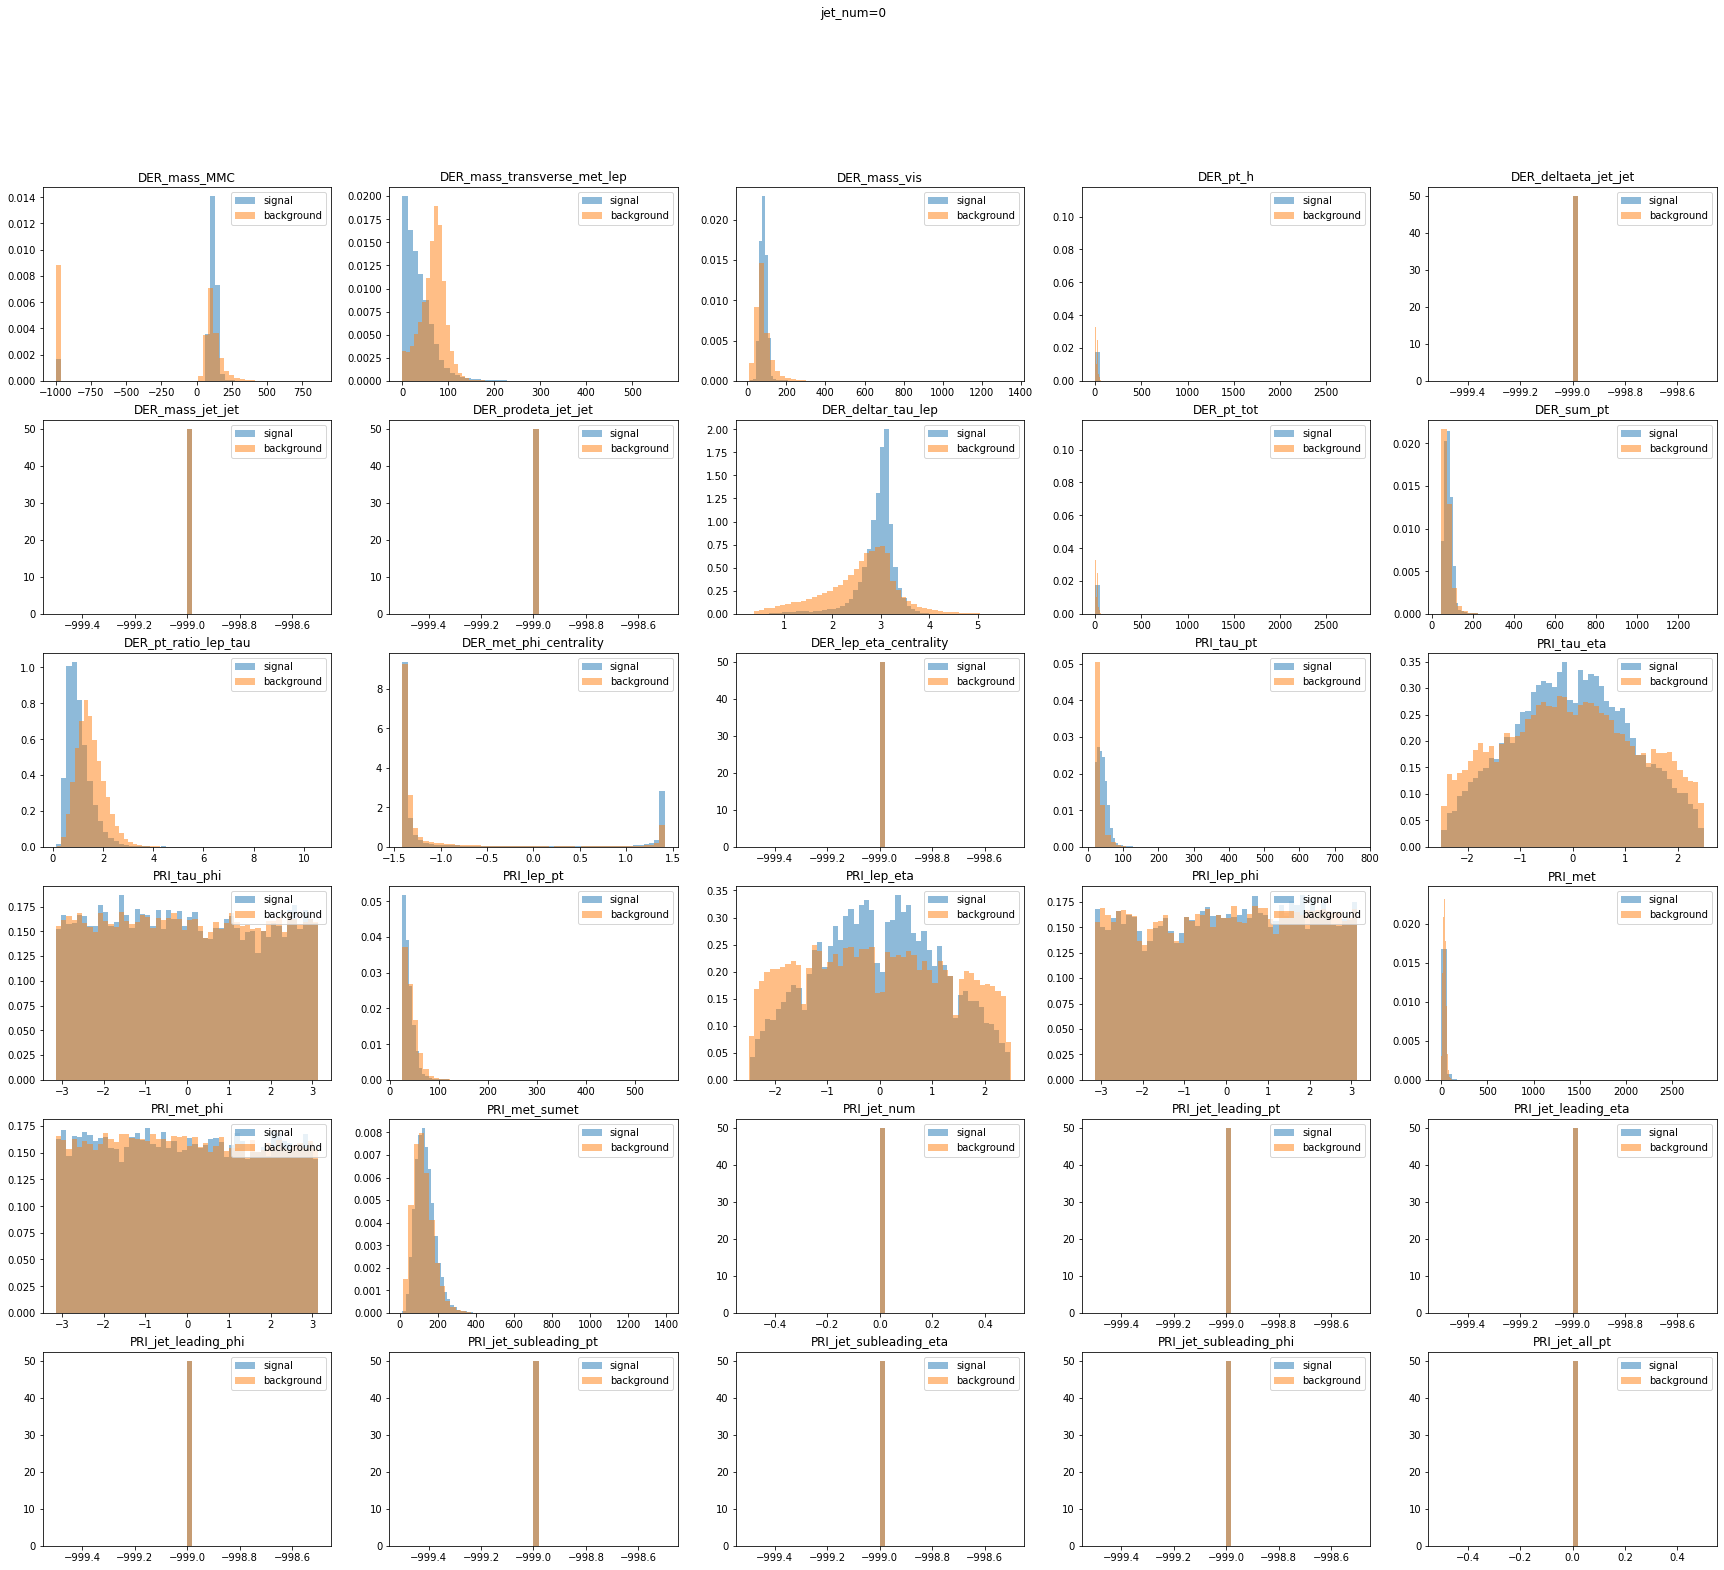

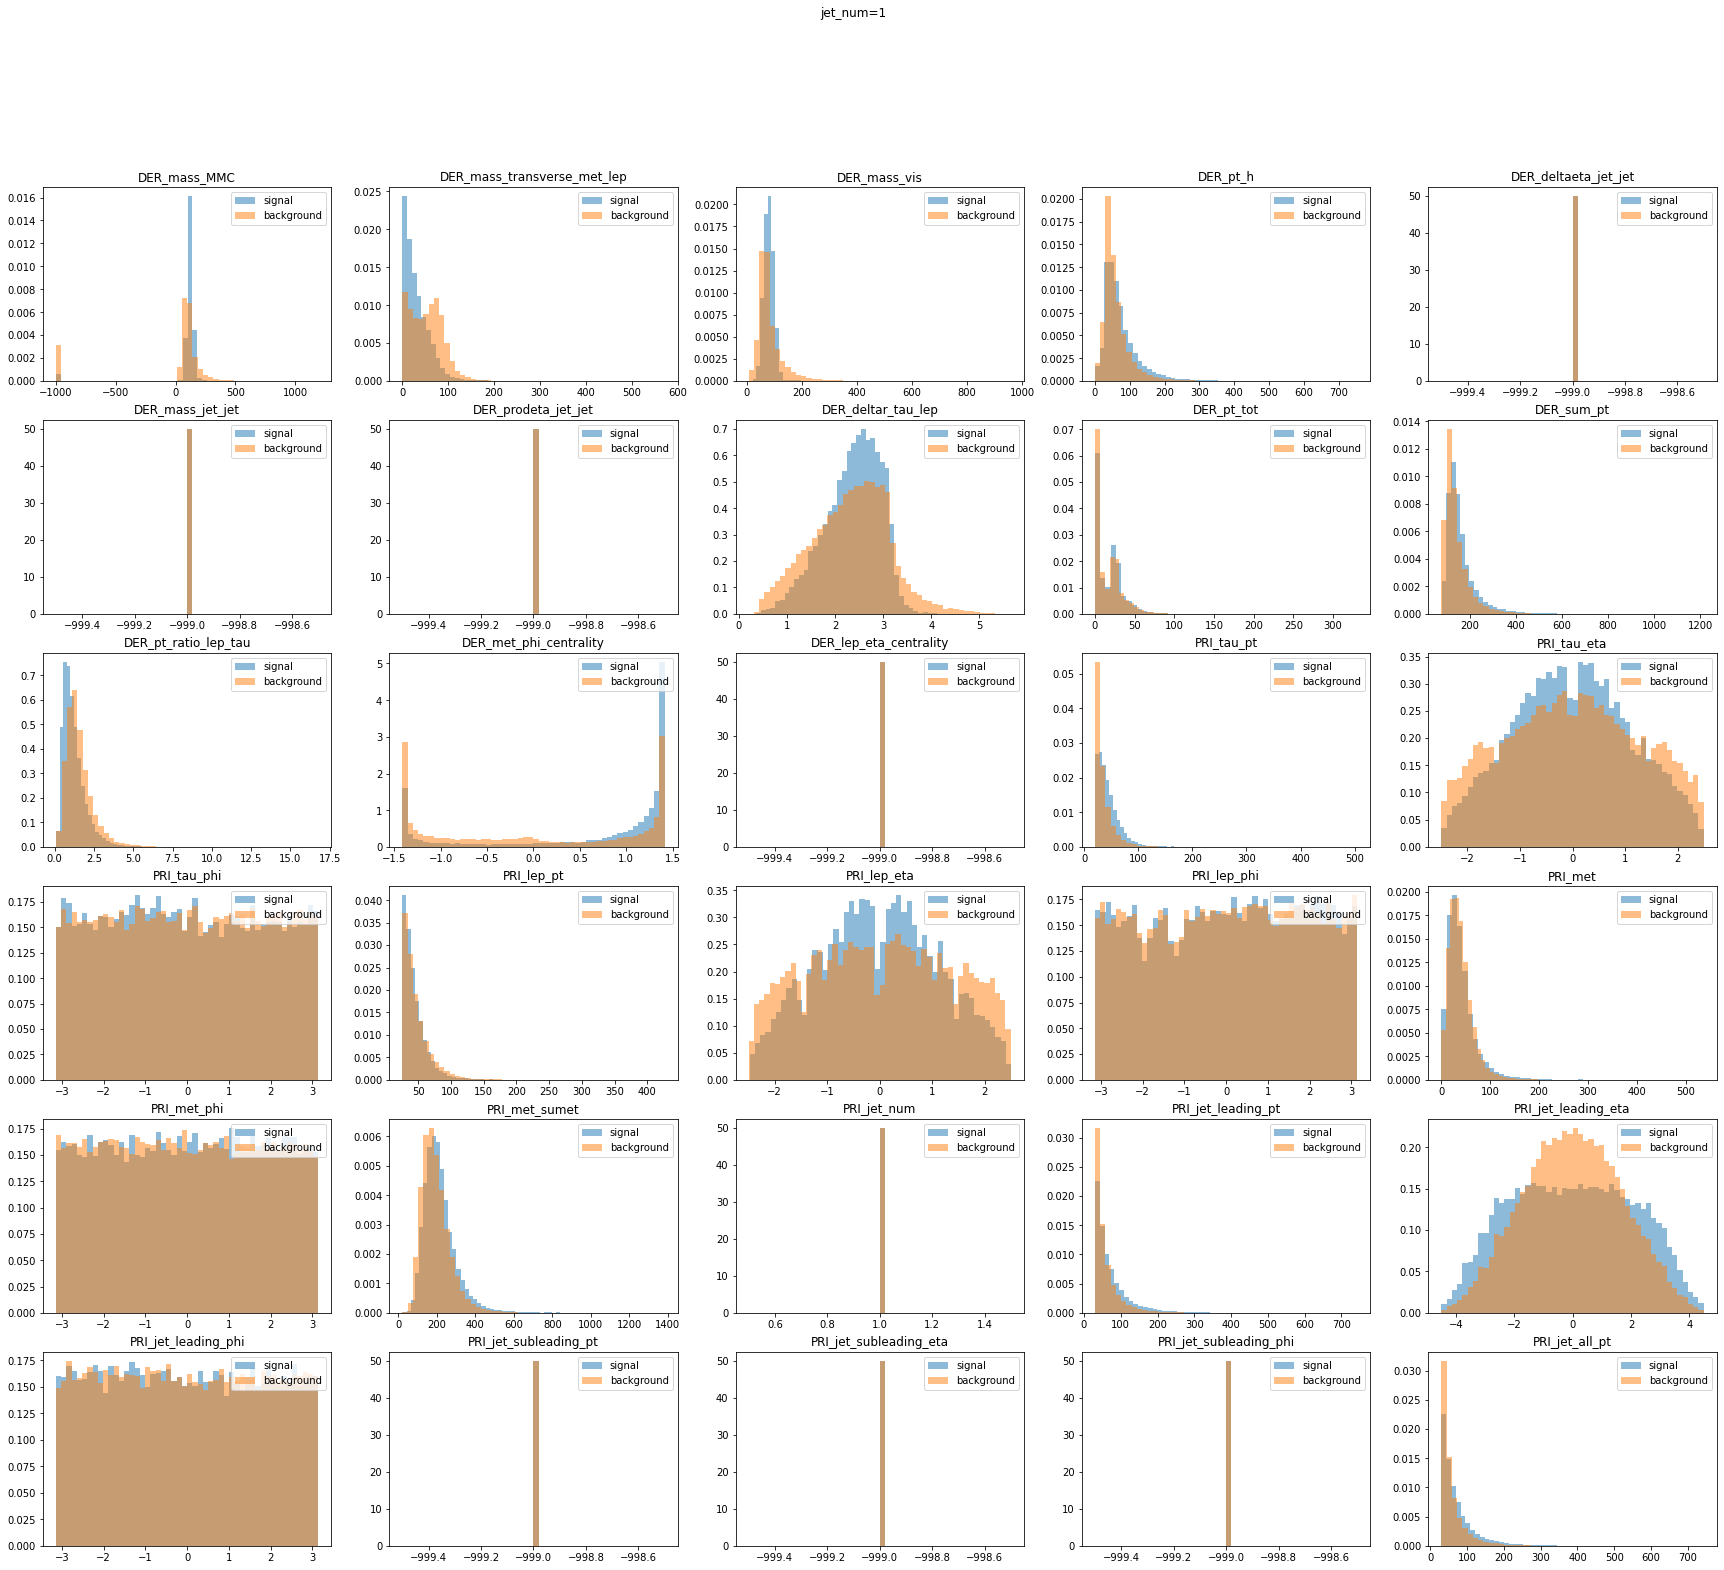

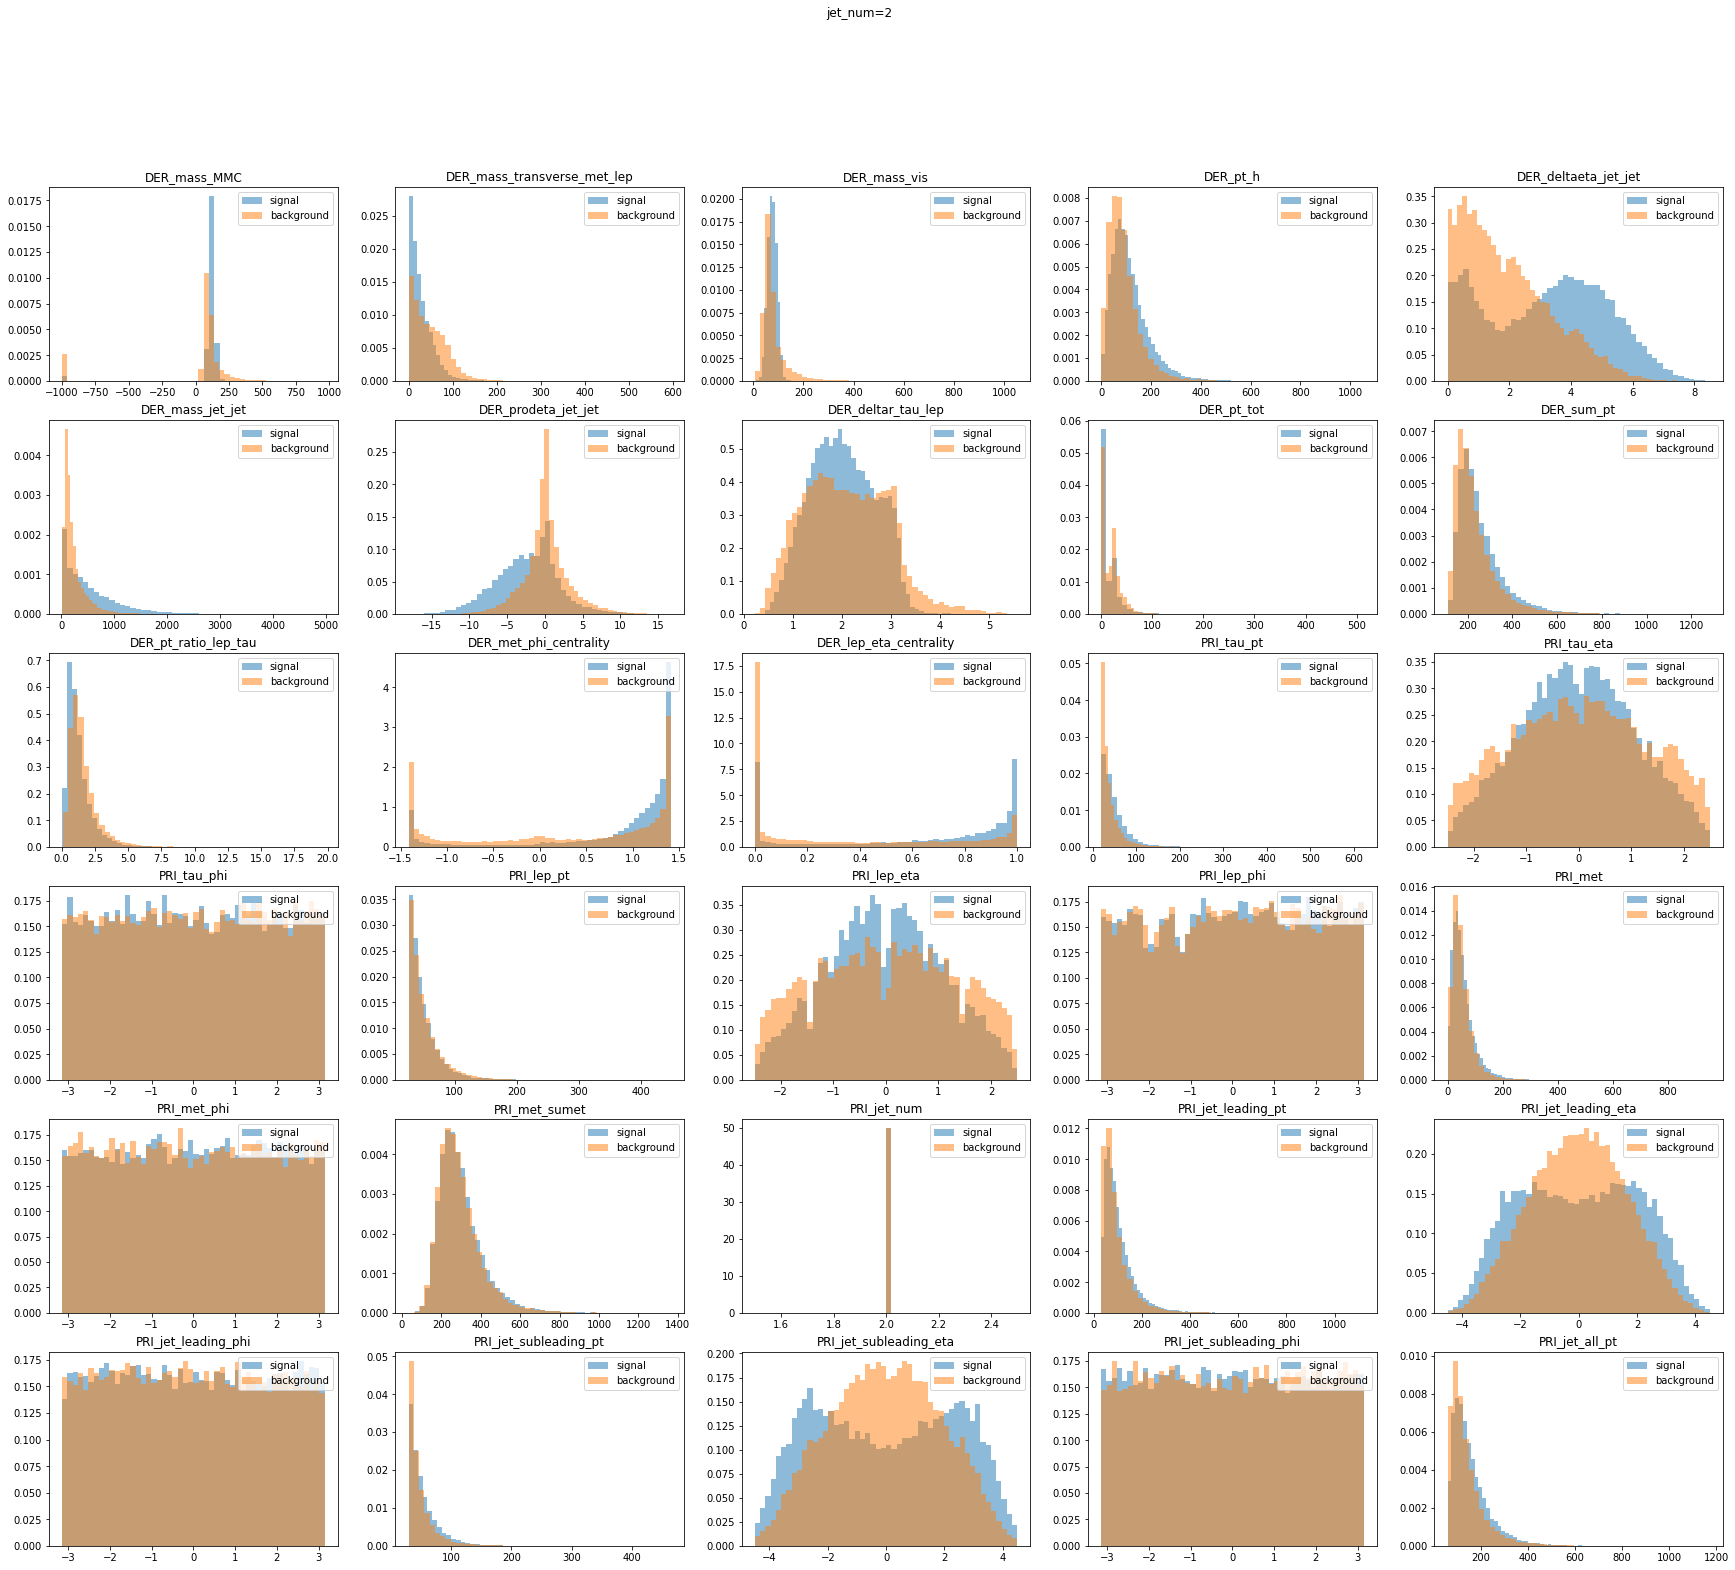

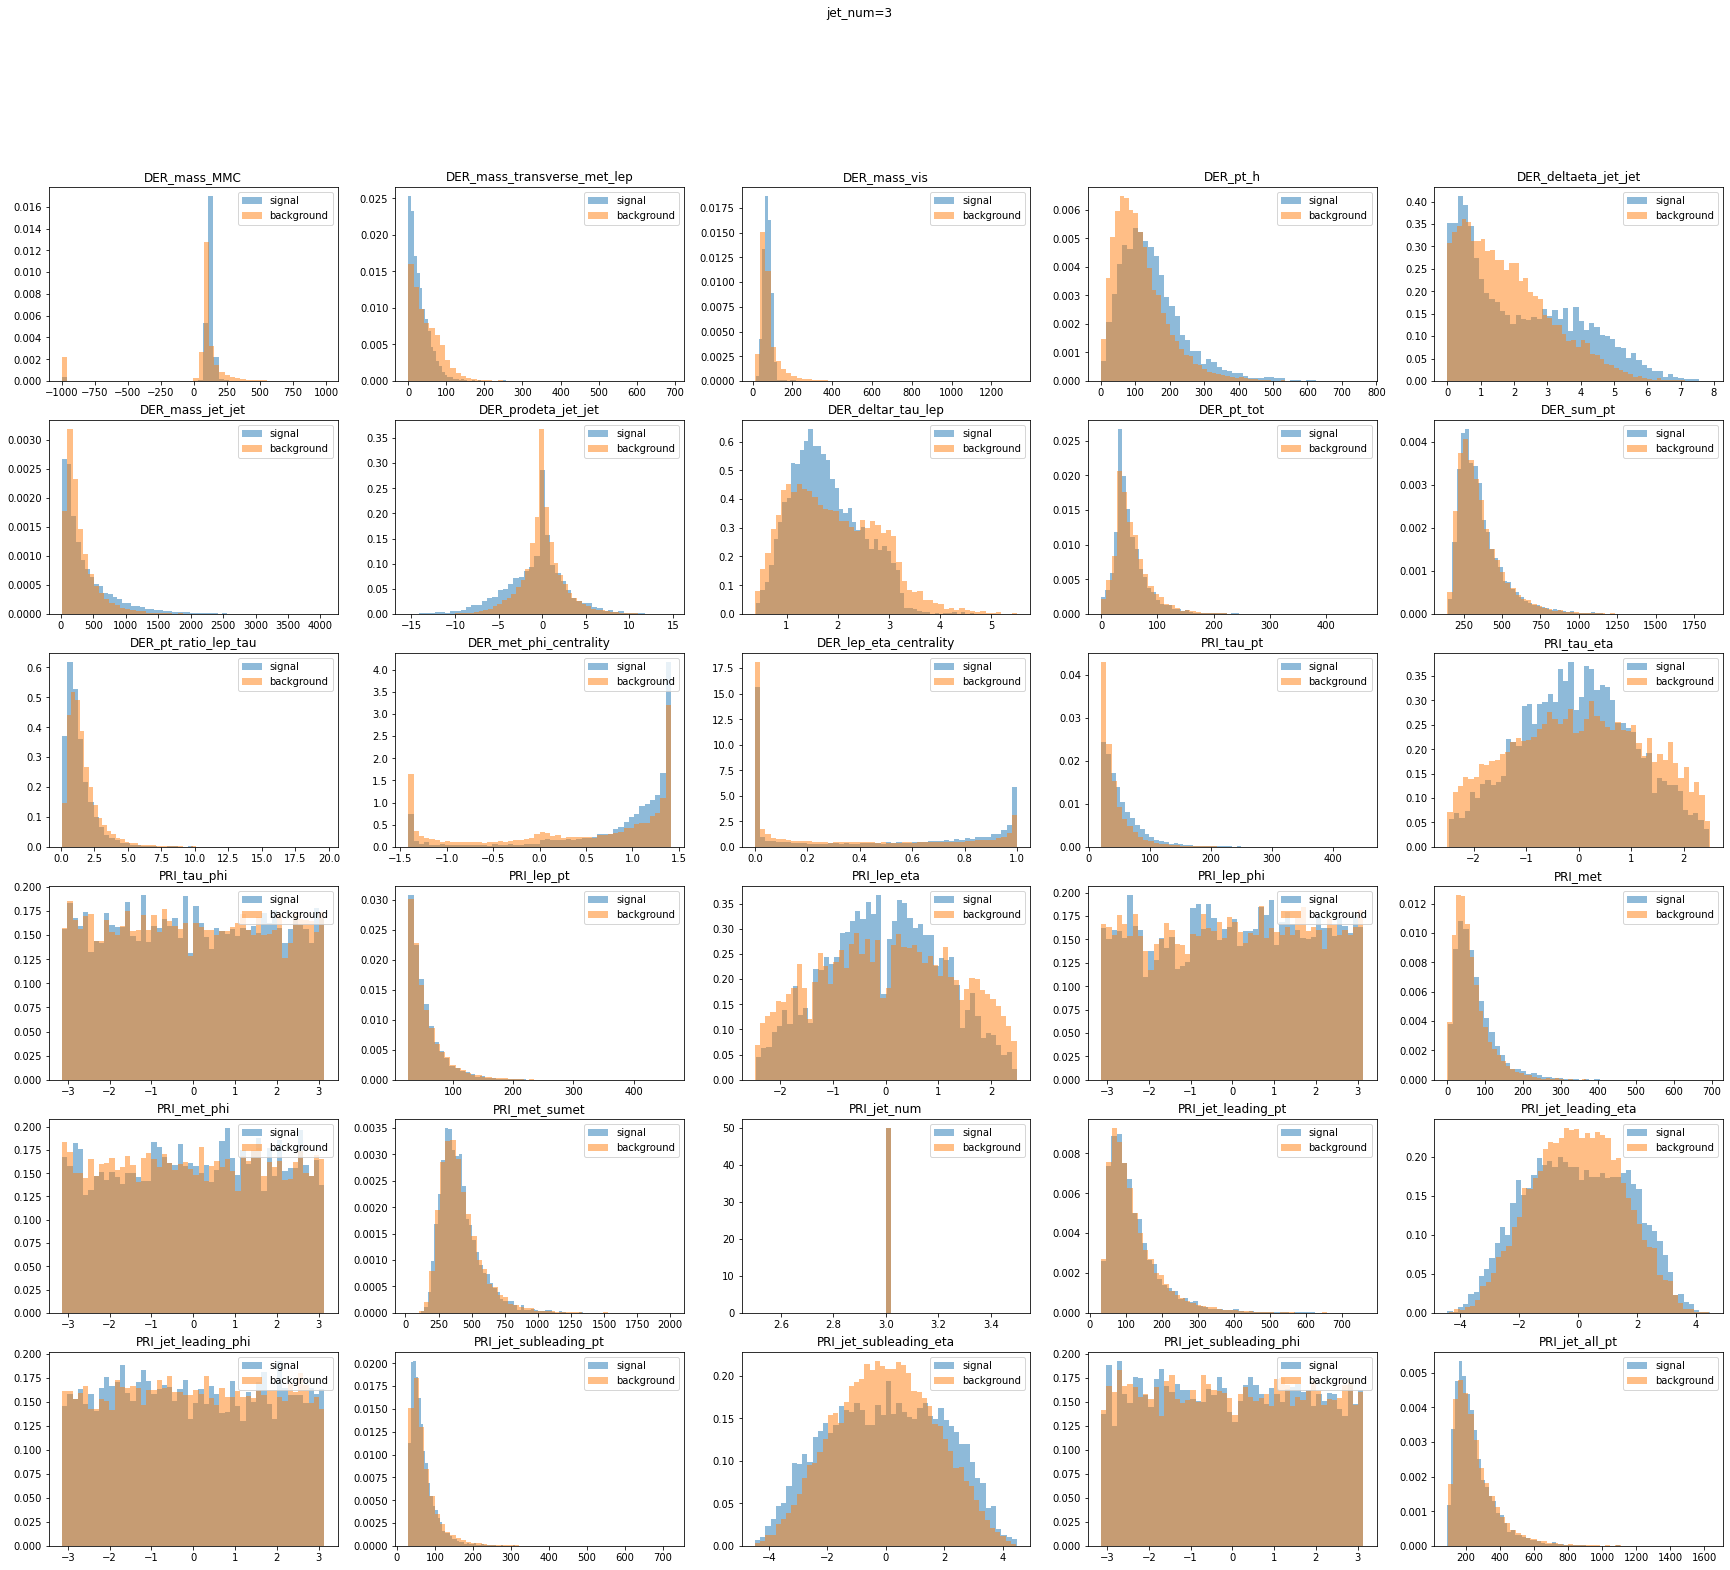

In [180]:
num_row = 6
num_col = 5
jet_nums_ = [0,1,2,3]
for jet_num in jet_nums_:
    f, axs = plt.subplots(num_row, num_col,figsize=(30,25))
    axs = axs.ravel()

    for idx,ax in enumerate(axs):
        ax.hist(tX_sig[np.where(tX_sig[:,22]==jet_num)[0],idx],density=True, bins=50,alpha=0.5,label = 'signal')
        ax.hist(tX_back[np.where(tX_back[:,22]==jet_num)[0],idx],density=True, bins=50,alpha=0.5,label = 'background')
        ax.legend(loc='upper right')
        ax.set_title(feature_names[idx])
    f.suptitle('jet_num=%i'%jet_num);

## Do your thing crazy machine learning thing here :) ...

## Generate predictions and save ouput in csv format for submission:

In [10]:
DATA_TEST_PATH = '' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [31]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)